# Caso 1 
## Jimena Chacón (B81999)



#### Ejercicio
Se tiene un banco donde la suficiencia patrimonial SUGEF 3-06, es decir,
$$ ISP = \frac{CB}{RC + 10(RP + RO + RTC)}$$,

toma el valor de ISP = 11.7% a partir de la siguientes variables (todos los montos en millones de colones).

Capital base: CP = 1150

Riesgo de crédito: RC = 8905

Riesgo de precio: RP = 72.3

Riesgo operativo: RO = 15.2

Riesgo de tipo de cambio: RT C = 4.7

La entidad tiene una cartera de crédito con saldo 8050 millones. El rendimiento neto de los créditos (tomando en cuenta costos) es del 3%. También posee una cartera de inversiones de alta calidad valorada en 976 millones con un rendimiento neto de 1%.
El equipo de riesgo de crédito ha determinado que las pérdidas de crédito a un año plazo siguen una distribución Gamma de media 80.5 millones y desviación estándar 87.2 millones.
El objetivo es analizar posibles escenarios para la suficiencia patrimonial del banco después de un año. Considere que otras fuentes de ingreso o gasto son despreciables.


In [3]:
#Inicialmente se cargan las librerías y los datos 

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

CP = 1150  # Capital base
RC = 8905  # Riesgo de crédito 
RP = 72.3  # Riesgo de precio 
RO = 15.2  # Riesgo operativo 
RTC = 4.7  # Riesgo de tipo de cambio 
ISP_inicial = 11.7  

# Cartera de crédito e inversiones
cartera_credito = 8050 
rendimiento_credito = 0.03 
cartera_inversiones = 976  
rendimiento_inversiones = 0.01  

# Distribución Gamma para pérdidas crediticias
media_perdidas = 80.5  
desv_estandar_perdidas = 87.2  
alpha = (media_perdidas / desv_estandar_perdidas) ** 2
beta = media_perdidas / alpha


n_simulaciones = 10000
perdidas_credito = np.random.gamma(alpha, beta, n_simulaciones)

### Inciso a) 
El mínimo valor que el ISP podría alcanzar en un año con 99% de seguridad.

In [4]:
# ISP después de un año
ingreso_credito = cartera_credito * rendimiento_credito
ingreso_inversiones = cartera_inversiones * rendimiento_inversiones
capital_final = CP + ingreso_credito + ingreso_inversiones - perdidas_credito
RC_final = RC - perdidas_credito

ISP_final = capital_final / (RC_final + 10 * (RP + RO + RTC)) * 100

ISP_min_99 = np.percentile(ISP_final, 1)
print(f"ISP inicial: {ISP_inicial}%")
print(f"ISP mínimo con 99% de confianza: {ISP_min_99:.2f}%")

ISP inicial: 11.7%
ISP mínimo con 99% de confianza: 10.53%


### Inciso b) 
Probabilidad de que la entidad entre en irregularidad a un año plazo, es decir ISP < 10%.

In [5]:
probabilidad_irregularidad = np.mean(ISP_final < 10) * 100
print(f"Probabilidad de irregularidad (ISP < 10%): {probabilidad_irregularidad:.2f}%")

Probabilidad de irregularidad (ISP < 10%): 0.56%


### Inciso c)
Simulación Montecarlo para encontrar la distribución completa de ISP. 

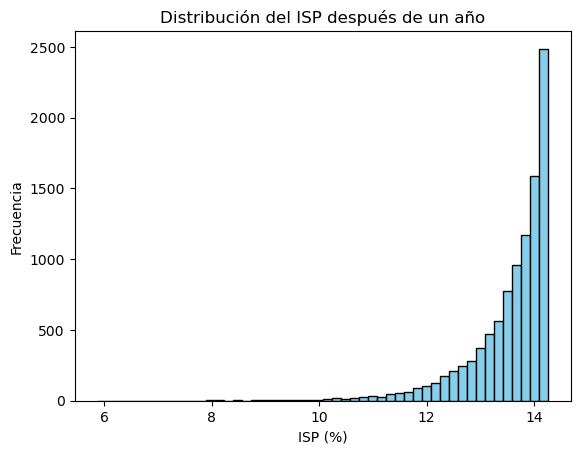

In [6]:
plt.hist(ISP_final, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del ISP después de un año')
plt.xlabel('ISP (%)')
plt.ylabel('Frecuencia')
plt.show()